In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from google.colab import files
import io

In [0]:
uploaded = files.upload()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "training.1600000.processed.noemoticon.csv" with length 238803811 bytes


In [0]:
df= pd.read_csv(io.StringIO(uploaded['training.1600000.processed.noemoticon.csv'].decode('ISO-8859-1')), error_bad_lines=False,encoding='ISO-8859-1')

In [5]:
df['NO_QUERY'].value_counts() 

NO_QUERY    1599999
Name: NO_QUERY, dtype: int64

In [6]:
df['0'].value_counts()

4    800000
0    799999
Name: 0, dtype: int64

In [7]:
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
list(df.columns)

['0',
 '1467810369',
 'Mon Apr 06 22:19:45 PDT 2009',
 'NO_QUERY',
 '_TheSpecialOne_',
 "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]

In [0]:
df1 = pd.DataFrame([['0',
 '1467810369',
 'Mon Apr 06 22:19:45 PDT 2009',
 'NO_QUERY',
 '_TheSpecialOne_',
 "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]],
                  columns=['target','ids','date','flag','user','text'])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  1 non-null      object
 1   ids     1 non-null      object
 2   date    1 non-null      object
 3   flag    1 non-null      object
 4   user    1 non-null      object
 5   text    1 non-null      object
dtypes: object(6)
memory usage: 176.0+ bytes


In [11]:
df=df.rename(columns={'0': 'target','1467810369':'ids','Mon Apr 06 22:19:45 PDT 2009':'date','NO_QUERY':'flag',
                   '_TheSpecialOne_':'user',
                   "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'text'})
df

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [13]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [0]:
df['target']=df['target'].astype(int)
df['ids']=df['ids'].astype(int)
df1['target']=df1['target'].astype(int)
df1['ids']=df1['ids'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  1 non-null      int64 
 1   ids     1 non-null      int64 
 2   date    1 non-null      object
 3   flag    1 non-null      object
 4   user    1 non-null      object
 5   text    1 non-null      object
dtypes: int64(2), object(4)
memory usage: 176.0+ bytes


In [17]:
df=pd.concat([df1,df])
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [18]:
df['date']=pd.to_datetime( df['date'])

/usr/local/lib/python3.6/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [19]:
df.duplicated()

0          False
0          False
1          False
2          False
3          False
           ...  
1599994    False
1599995    False
1599996    False
1599997    False
1599998    False
Length: 1600000, dtype: bool

In [0]:
df=df.reset_index()

In [0]:
df.drop('index',axis=1,inplace=True)

In [22]:
df

,target,ids,date,flag,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   target  1600000 non-null  int64         
 1   ids     1600000 non-null  int64         
 2   date    1600000 non-null  datetime64[ns]
 3   flag    1600000 non-null  object        
 4   user    1600000 non-null  object        
 5   text    1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


In [0]:
df['text_length'] = df['text'].apply(len)

In [25]:
df

,target,ids,date,flag,user,text,text_length
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65


In [26]:
df['text_length'].describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64

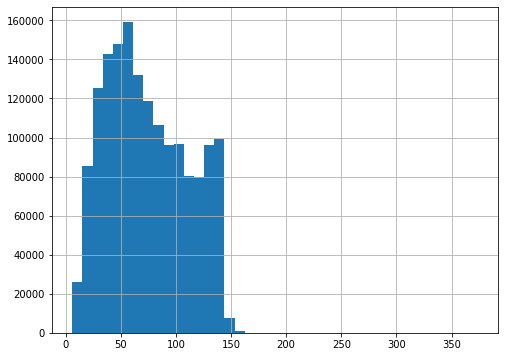

In [27]:
plt.figure(figsize=(8,6))
df['text_length'].hist(bins=40)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6e1c366a0>,
      dtype=object)

<Figure size 720x576 with 0 Axes>

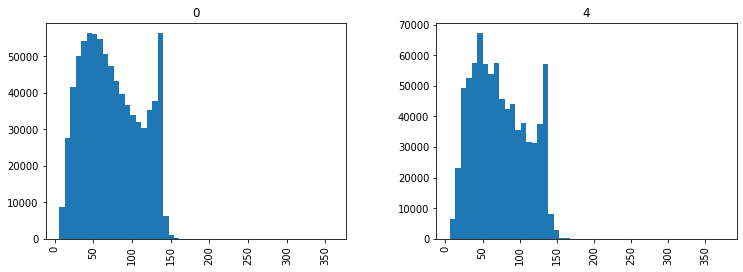

In [28]:
plt.figure(figsize=(10,8))
df.hist(column='text_length', by='target', bins=50,figsize=(12,4))

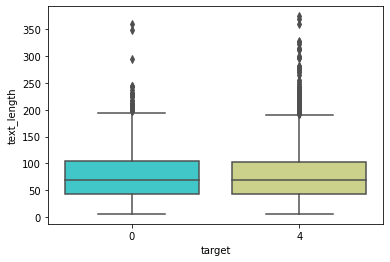

In [29]:
sns.boxplot(x='target',y='text_length',data=df,palette='rainbow')

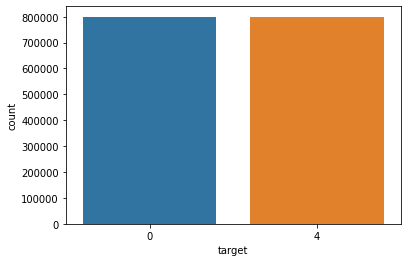

In [30]:
sns.countplot('target',data=df)

## First Approach:

### Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation: 

In [0]:
import string
from nltk.corpus import stopwords

In [32]:
import nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [0]:
def text_process(tweet):
    nopunc=[char for char in tweet if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [0]:
df['new']= df['text'].apply( lambda tweet : text_process(tweet))

In [35]:
df

,target,ids,date,flag,user,text,text_length,new
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,"[switchfoot, httptwitpiccom2y1zl, Awww, thats,..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,"[upset, cant, update, Facebook, texting, might..."
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,"[Kenichan, dived, many, times, ball, Managed, ..."
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,"[nationwideclass, behaving, im, mad, cant, see]"
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,"[woke, school, best, feeling, ever]"
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,78,"[TheWDBcom, cool, hear, old, Walt, interviews,..."
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,"[ready, MoJo, Makeover, Ask, details]"
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,"[Happy, 38th, Birthday, boo, alll, time, Tupac..."


### Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['new'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

1560982


In [0]:
messages_bow = bow_transformer.transform(df['new'])

In [39]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (1600000, 1560982)
Amount of Non-Zero occurences:  1599677


### TF-IDF

TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [41]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1600000, 1560982)


### Training a model

In [0]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,df['target'])

### Model Evaluation

In [43]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

[0 0 0 ... 4 4 4]


In [44]:
len(all_predictions)

1600000

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(df['target'], all_predictions))
print('\n')
print (confusion_matrix(df['target'], all_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    800000
           4       1.00      1.00      1.00    800000

    accuracy                           1.00   1600000
   macro avg       1.00      1.00      1.00   1600000
weighted avg       1.00      1.00      1.00   1600000



[[799107    893]
 [  3775 796225]]


In [0]:
predict_ser=pd.Series(all_predictions.reshape(1600000,))
df_1= df['target']
df1_result=pd.concat([df_1,predict_ser],axis=1)
df1_result.columns=['Actual','Predicted']

In [47]:
df1_result

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1599995,4,4
1599996,4,4
1599997,4,4
1599998,4,4


## Second Approach

### NLP Classification 

In [0]:
df_class = df[(df.target==0) | (df.target==4)]

In [0]:
X = df['text']
y = df_class['target']

**Import CountVectorizer and create a CountVectorizer object.**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [0]:
X = cv.fit_transform(X)

## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

*Import MultinomialNB and create an instance of the estimator and call is nb*

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [83]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Using the predict method off of nb to predict labels from X_test.**

In [0]:
predictions = nb.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[196103  43575]
 [ 62042 178280]]


              precision    recall  f1-score   support

           0       0.76      0.82      0.79    239678
           4       0.80      0.74      0.77    240322

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000



# Third Approach

# Using Text Processing

*Import TfidfTransformer and Pipeline from sklearn.*

In [0]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [0]:
X = df['text']
y = df_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [0]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [91]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ff6da0041e0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions = pipeline.predict(X_test)

In [93]:
print(classification_report(predictions,y_test))
print('\n')
print (confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78    263962
           4       0.71      0.79      0.75    216038

    accuracy                           0.76    480000
   macro avg       0.76      0.77      0.76    480000
weighted avg       0.77      0.76      0.76    480000



[[195204  68758]
 [ 44474 171564]]
